## Explore the process of image anomaly detection using a simple or convolutional autoencoder. Use  images from the MNIST handwritten digit dataset  as the normal data, and images from the Fashion-MNIST fashion product dataset as the anomaly data. The task is to develop an anomaly detection system, which is trained by the normal data only but will be used to identify the normal data and the anomaly data during testing.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow, keras
from keras.layers import *
from keras.models import *
from tensorflow.keras.datasets import mnist, fashion_mnist

In [11]:
(x_train,_), (x_test,_) = mnist.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [12]:
(_,_),(anamoly_data,_) = fashion_mnist.load_data()
anamoly_data = anamoly_data.astype('float32')/255

In [17]:
x_train.shape, anamoly_data.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [16]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
anamoly_data = anamoly_data.reshape(anamoly_data.shape[0],28,28,1)

In [63]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(1,(3,3),activation='relu',padding='same'))

In [64]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_154 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_155 (Conv2D)         (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_156 (Conv2D)         (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 4, 4, 8)        

In [67]:
model.compile(optimizer='adam',loss='mean_squared_error')
history = model.fit(x_train, x_train, epochs=5, batch_size=120, validation_data=(x_test,x_test))

Epoch 1/5
500/500 [==============================] - 131s 255ms/step - loss: 0.0341 - val_loss: 0.0236
Epoch 2/5
500/500 [==============================] - 124s 248ms/step - loss: 0.0212 - val_loss: 0.0190
Epoch 3/5
500/500 [==============================] - 121s 242ms/step - loss: 0.0181 - val_loss: 0.0168
Epoch 4/5
500/500 [==============================] - 123s 246ms/step - loss: 0.0164 - val_loss: 0.0154
Epoch 5/5
500/500 [==============================] - 120s 240ms/step - loss: 0.0152 - val_loss: 0.0143


In [68]:
pred = model.predict(x_test)
mse_mnist = np.mean(np.square(x_test-pred))

313/313 [==============================] - 8s 25ms/step


In [69]:
pred1 = model.predict(anamoly_data)
mse_anamoly = np.mean(np.square(anamoly_data-pred1))

313/313 [==============================] - 10s 32ms/step


In [ ]:
threshold = 0.2

In [3]:
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(x_train, x_train, epochs=5, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/5
469/469 [==============================] - 256s 538ms/step - loss: 0.1128 - val_loss: 0.1140
Epoch 2/5
469/469 [==============================] - 262s 559ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 3/5
469/469 [==============================] - 391s 833ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 4/5
469/469 [==============================] - 226s 482ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 5/5
469/469 [==============================] - 240s 511ms/step - loss: 0.1120 - val_loss: 0.1140


In [6]:
reconstructions_mnist = autoencoder.predict(x_test)
mse_mnist = np.mean(np.square(x_test_reshaped - reconstructions_mnist))

reconstructions_anomaly = autoencoder.predict(x_anomaly)
mse_anomaly = np.mean(np.square(x_anomaly_reshaped - reconstructions_anomaly))

threshold = 0.02  

is_anomaly_mnist = mse_mnist > threshold
is_anomaly_anomaly = mse_anomaly > threshold

313/313 [==============================] - 11s 36ms/step


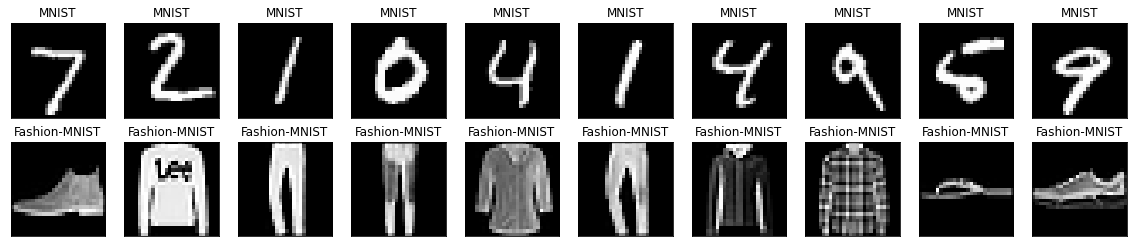

In [9]:
plt.figure(figsize=(20, 4))
for i in range(10):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title("MNIST")
    plt.xticks([]), plt.yticks([])

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_anomaly[i].reshape(28, 28))
    plt.title("Fashion-MNIST")    
    plt.xticks([]), plt.yticks([])

plt.show()